# Homework 4

The American Community Survey (ACS) is a large survey of households
and individuals in the United States, carried out by the US
government on a continuous basis (around 3.5 million people are
contacted per year).  It is arguably the most authoritative source
of information about the demographic composition of the US
population, and is used for many purposes in academic research,
government, public policy, and in private industry.

Some of the questions in the ACS are about sensitive topics, and therefore are only released in aggregate form. The "public use microsample" (PUMS) is a set of individual ACS responses that only includes information that has been deemed safe for public release at the individual level. Here we will work with a subset of the ACS/PUMS data.

You will need to refer to the documentation to know what the ACS variable names mean: **[ACS PUMS Codebooks](https://www.census.gov/programs-surveys/acs/microdata/documentation/2018.html)** Scroll down for data dictionary 2018 "1-year" ACS/PUMS, available in several formats. This file is also available as a [PDF on our Google Drive](https://drive.google.com/file/d/1Oact1X4F1USo8rhAU9w4AjhEbFhwpK19/view?usp=drive_link).

For this course, we are providing a simplified version of the ACS/PUMS data from 2018. It contains a random subset of the cases and a selected subset of variables.

Note that many PUMS variables are described as being "household" or "individual" variables. These refer to characteristics of households (one or more people living at the same address) or to characteristics of individual people, respectively.


In [58]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [59]:
acs = pd.read_csv("pums_short.csv.gz")
acs

,DIVISION,PUMA,REGION,ST,NP,MRGP,RNTP,TEN,VALP,VEH,...,NRC,PARTNER,R18,R60,R65,TAXAMT,WIF,WKEXREL,WORKSTAT,FFINCP
0,6,800,3,1,4,550.0,NaN,1.0,60000.0,4.0,...,1.0,0.0,1.0,0.0,0.0,325.0,3.0,1.0,1.0,0
1,6,2500,3,1,1,NaN,NaN,2.0,120000.0,1.0,...,0.0,0.0,0.0,1.0,1.0,625.0,NaN,NaN,NaN,0
2,6,2702,3,1,3,NaN,120.0,3.0,NaN,2.0,...,2.0,0.0,1.0,0.0,0.0,NaN,0.0,15.0,15.0,0
3,6,1303,3,1,1,NaN,650.0,3.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
4,6,2000,3,1,5,NaN,950.0,3.0,NaN,3.0,...,1.0,0.0,1.0,0.0,0.0,NaN,3.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276627,8,300,4,56,3,650.0,NaN,1.0,5575000.0,4.0,...,0.0,0.0,0.0,2.0,2.0,1450.0,0.0,9.0,9.0,0
276628,8,400,4,56,1,NaN,450.0,3.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
276629,8,500,4,56,2,NaN,NaN,4.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
276630,8,500,4,56,2,NaN,NaN,2.0,160000.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0


## Question 1

### Q 1.a

Display the number of rows and columns in the table `acs` as well as the column names.


In [60]:

print("Q1.a:","(rows, columns):", acs.shape)
print("Column Names: ",acs.columns)


Q1.a: (rows, columns): (276632, 31)
Column Names:  Index(['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP',
       'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV',
       'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT',
       'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP'],
      dtype='object')



### Q 1.b

Using the codebook, investigate the `"R65"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Produce a plot that shows the distribution of `"R65"` or its key features.
* Interpret the plot: what would say is a typical for for `"VALP"`?
* Compute the cumulative proportions of this variable.
* What proportion of households have either 0 or 1 person aged 65 or older?



Q1.b:
R65 data type: float64 This column contains the households in which there are members greater or equal to the age of 65
This data is quantitative and discrete


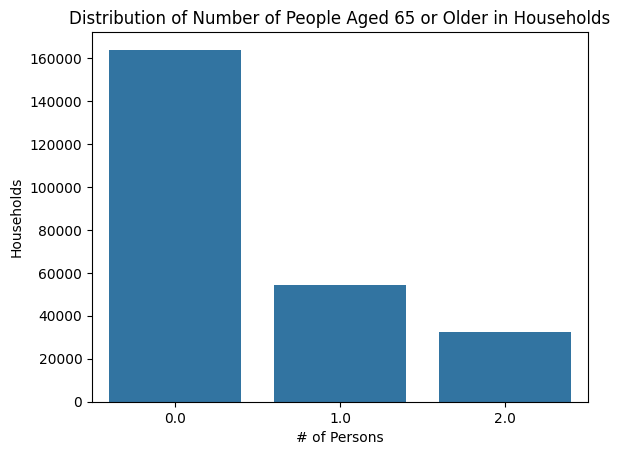

Based on the figure, it can be inferred that most households do not have someone aged 65 or higher, a typical value for VALP would be 0.0
R65
0.0    0.652720
1.0    0.869787
2.0    1.000000
Name: proportion, dtype: float64
Proportion of households with 0 or 1 person aged 65 or older: 0.8697867492102191


In [61]:
print("Q1.b:")
print("R65 data type:", acs['R65'].dtype, "This column contains the households in which there are members greater or equal to the age of 65")
print("This data is quantitative and discrete")
sb.countplot(x=acs['R65'])
plt.title("Distribution of Number of People Aged 65 or Older in Households")
plt.xlabel('# of Persons')
plt.ylabel('Households')
plt.show()
print(f"Based on the figure, it can be inferred that most households do not have someone aged 65 or higher, a typical value for VALP would be {acs['R65'].median()}")
cum_prop = acs['R65'].value_counts(normalize=True).sort_index().cumsum()
print(cum_prop)
prop_0_or_1 = cum_prop[1] 
print(f"Proportion of households with 0 or 1 person aged 65 or older: {prop_0_or_1}")


### Q 1.c

Using the codebook, investigate the `"VALP"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Produce a plot that shows the distribution of `"VALP"` or its key features.
* Interpret the plot: what would you say is a typical for for `"VALP"`?
* Using numerical summaries, compute the proportion of households that are have less than 50,000 in property value, less than 100,000 in property value, and less than 200,000 in property value.
* Compute the 0.1, 0.5, and 0.75 quantiles of `"VALP"`.


Q1c:  float64
This column contains quantitative data relating to the property value of the house for homeowners and is continuous


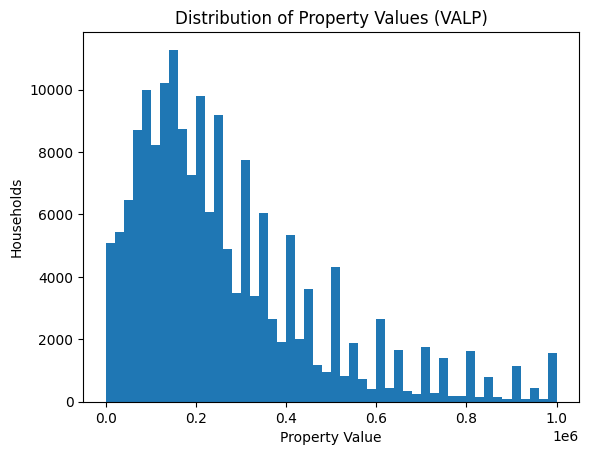

It appears that VALP follows a skewed normal distriubtion, with a typical value around 210000.0
Proportion < 50k: 0.04857717111541687
Proportion < 100k: 0.12894025275456203
Proportion < 200k: 0.29422120362069465
Quantiles as follow:
0.10     60000.0
0.50    210000.0
0.75    375000.0
Name: VALP, dtype: float64


In [62]:
print("Q1c: ",acs["VALP"].dtype)
print("This column contains quantitative data relating to the property value of the house for homeowners and is continuous")
acs['VALP'].plot(kind='hist', bins=50, range=(0, 1000000))
plt.title("Distribution of Property Values (VALP)")
plt.xlabel("Property Value")
plt.ylabel("Households")
plt.show()
print(f"It appears that VALP follows a skewed normal distriubtion, with a typical value around {acs["VALP"].median()}")
less_than_50k = (acs['VALP'] < 50000).mean()
less_than_100k = (acs['VALP'] < 100000).mean()
less_than_200k = (acs['VALP'] < 200000).mean()
print(f"Proportion < 50k: {less_than_50k}")
print(f"Proportion < 100k: {less_than_100k}")
print(f"Proportion < 200k: {less_than_200k}")
quantiles = acs['VALP'].quantile([0.1, 0.5, 0.75])
print("Quantiles as follow:")
print(quantiles)



### Q 1.d

Using the codebook, investigate the `"REGION"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Using the `replace` method for Series objects, replace the numbers in the `"REGION"` column with the names of the regions. Call this new column `"REGION_name"`.
* Produce a plot that shows the distribution of `"REGION_name"` or its key features.
* Calculate the distribution of the `"REGION_name"` column and print out the results. What proportion of households are in the Northeast and the South combined?



Q1d:  int64
This column contains data relating to the region of a household with discrete vaues corresponding to nominal data


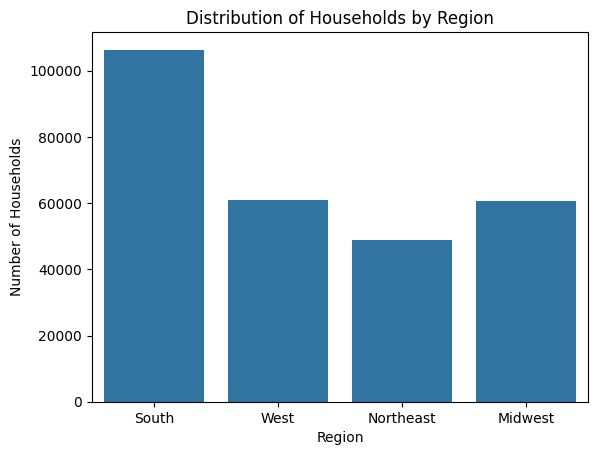

Proportion of households in Northeast and South: 0.5609907747476792


In [63]:
print("Q1d: ",acs["REGION"].dtype)
print("This column contains data relating to the region of a household with discrete vaues corresponding to nominal data")
region_mapping = {1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West'}
acs['REGION_name'] = acs['REGION'].replace(region_mapping)
sb.countplot(x='REGION_name', data=acs)
plt.title("Distribution of Households by Region")
plt.xlabel("Region")
plt.ylabel("Number of Households")
plt.show()
region_distribution = acs['REGION_name'].value_counts(normalize=True)
northeast_south_prop = region_distribution['Northeast'] + region_distribution['South']
print(f"Proportion of households in Northeast and South: {northeast_south_prop}")






## Question 2

### Q 2.a

Review the `"ST"` column in the code book. We can see that the values for `"ST"` are numbers in the data set. Should we consider these to be *nominal* data? Why or why not?


We should consider them as nominal data since each number represents a state code. Therefor, although the data is in numbers it is not quantitative data, and it is not ordinal as their is no ranking of states.


### Q 2.b

Below are two lists with the state codes and the state names listed in the code book for "ST".

Use these with the `replace` method for Series objects to get a new version of the `"ST"` column with nicer, easier to read names. Call this new column `"ST_name"`. Demonstrate your results by printing out the state name of the row at position 101,206 in the table.

In [64]:
st_nums = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 72]
st_names = "Alabama/AL,Alaska/AK,Arizona/AZ,Arkansas/AR,California/CA,Colorado/CO,Connecticut/CT,Delaware/DE,District of Columbia/DC,Florida/FL,Georgia/GA,Hawaii/HI,Idaho/ID,Illinois/IL,Indiana/IN,Iowa/IA,Kansas/KS,Kentucky/KY,Louisiana/LA,Maine/ME,Maryland/MD,Massachusetts/MA,Michigan/MI,Minnesota/MN,Mississippi/MS,Missouri/MO,Montana/MT,Nebraska/NE,Nevada/NV,New Hampshire/NH,New Jersey/NJ,New Mexico/NM,New York/NY,North Carolina/NC,North Dakota/ND,Ohio/OH,Oklahoma/OK,Oregon/OR,Pennsylvania/PA,Rhode Island/RI,South Carolina/SC,South Dakota/SD,Tennessee/TN,Texas/TX,Utah/UT,Vermont/VT,Virginia/VA,Washington/WA,West Virginia/WV,Wisconsin/WI,Wyoming/WY,Puerto Rico/PRa".split(",")

state_mapping = dict(zip(st_nums, st_names))
acs['ST_name'] = acs['ST'].replace(state_mapping)
print(acs.loc[101206, 'ST_name'])



Iowa/IA


### Q 2.c

Review the codebook for the `PUMA` column. The description notes that we need to "use with ST for unique code." In other words, the same PUMA code may appear in multiple states, so knowing just the PUMA code is not sufficient to know where a household lives.

Verify this result by using `groupby` to create a tall table that contains the number of households in each "ST_name" and "PUMA" combination (hint: recall the `.size()` method). Use the `.reset_index()` method on this result to make it a little easier to work with. Call this table `ST_PUMA`.

Show that PUMA number 100 appears in multiple states.



In [65]:
ST_PUMA = acs.groupby(['ST_name', 'PUMA']).size().reset_index(name='count')
print(ST_PUMA[ST_PUMA['PUMA'] == 100])


                ST_name  PUMA  count
0            Alabama/AL   100    160
39           Arizona/AZ   100     97
93          Arkansas/AR   100    203
378         Colorado/CO   100    221
420      Connecticut/CT   100    139
608          Georgia/GA   100    139
680           Hawaii/HI   100    202
690            Idaho/ID   100    179
842             Iowa/IA   100    149
864           Kansas/KS   100    166
886         Kentucky/KY   100    191
920        Louisiana/LA   100    131
954            Maine/ME   100    219
964         Maryland/MD   100    121
1008   Massachusetts/MA   100    209
1060        Michigan/MI   100    313
1128       Minnesota/MN   100    250
1171     Mississippi/MS   100    130
1192        Missouri/MO   100    248
1239         Montana/MT   100     97
1246        Nebraska/NE   100    144
1278   New Hampshire/NH   100    226
1361      New Mexico/NM   100    236
1379        New York/NY   100    182
1524  North Carolina/NC   100    206
1602    North Dakota/ND   100    203
1


### Q 2.d

For each state, find the size (in terms of households) of the largest PUMA in that state.


In [66]:
largest_PUMA = acs.groupby(['ST_name', 'PUMA']).size().groupby('ST_name').max().reset_index(name='largest_PUMA')
print(largest_PUMA)

                    ST_name  largest_PUMA
0                Alabama/AL           457
1                 Alaska/AK           247
2                Arizona/AZ           353
3               Arkansas/AR           203
4             California/CA           354
5               Colorado/CO           221
6            Connecticut/CT           223
7               Delaware/DE           343
8   District of Columbia/DC           170
9                Florida/FL           358
10               Georgia/GA           233
11                Hawaii/HI           202
12                 Idaho/ID           180
13              Illinois/IL           291
14               Indiana/IN           183
15                  Iowa/IA           202
16                Kansas/KS           210
17              Kentucky/KY           197
18             Louisiana/LA           273
19                 Maine/ME           298
20              Maryland/MD           232
21         Massachusetts/MA           209
22              Michigan/MI       

### Q 2.e

For each `ST_name` and `PUMA` combination, add up the total income of all households. Use `.reset_index(name = "total_income")` to make the table a little easier to work with.

Graph the distribution of total income per ST_state-PUMA combination. Using the graph, answer the following questions:

* What is a typical value for these total incomes? 
* Where do most of the observations falls? 
* Do you see about equal variation across the range of the `total_income` values. 

(Note: there is a good chance the graph axes will be in "scientific notation." A value like 3e7 means $3 \times 10^7$.)


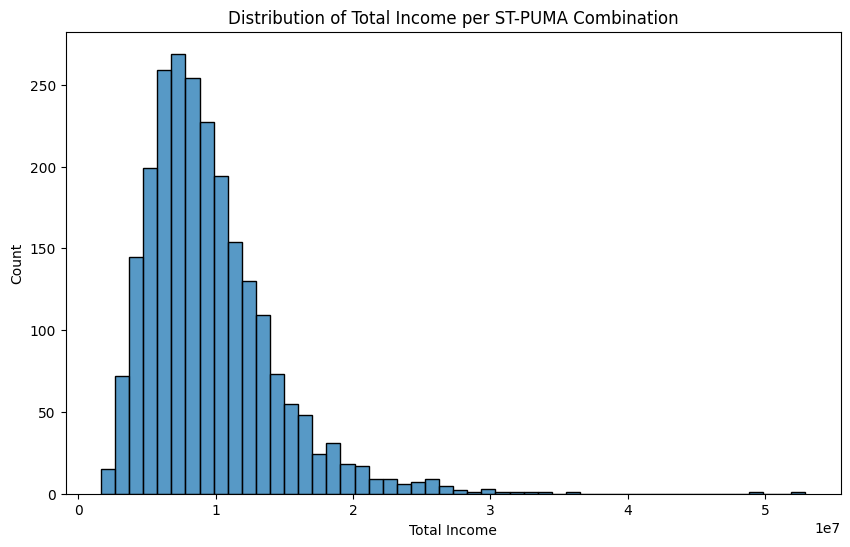

A typical value for total incomes is 8663750.0
Most observations fall within .5 * 1e7 to 1.5 * 1e7
There appears to not be equal vaiation across the range of the total_income values as this distribution appears to have positive skew


In [67]:
total_income = acs.groupby(['ST_name', 'PUMA'])['HINCP'].sum().reset_index(name='total_income')

# Plotting
plt.figure(figsize=(10, 6))
sb.histplot(total_income['total_income'], bins=50)
plt.title("Distribution of Total Income per ST-PUMA Combination")
plt.xlabel("Total Income")
plt.show()
print(f"A typical value for total incomes is {total_income['total_income'].median()}")
print("Most observations fall within .5 * 1e7 to 1.5 * 1e7")
print("There appears to not be equal vaiation across the range of the total_income values as this distribution appears to have positive skew")

